SI units for all quantities!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%run ../scripts/neighbor.py

In [2]:
x = np.linspace(-0.1,0.1,64)
y = np.linspace(-0.1,0.1,64)
dx = x[0] - x[1]

In [3]:
X,Y = np.meshgrid(x,y)
Z   = np.sqrt(X**2+Y**2)

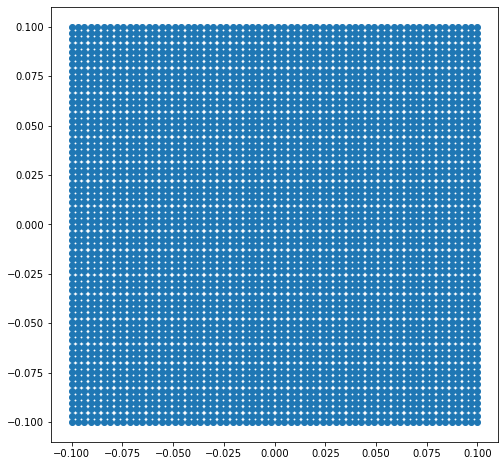

In [4]:
f,ax=plt.subplots(1,1)
f.set_size_inches(8,8)
ax.scatter(X,Y)

In [5]:
# 4 circles with centers at (0.01+/-r1,0.01+/-r1) (within the square!) with a radius of R1
R1 = 0.075
r1 = 0.01
C1 = np.where((((X-(0.1-r1))**2+(Y-(0.1-r1))**2)  > (R1**2)) & 
             (((X-(0.1-r1))**2+(Y-(-0.1+r1))**2) > (R1**2)) &
             (((X-(-0.1+r1))**2+(Y-(-0.1+r1))**2)> (R1**2)) &
             (((X-(-0.1+r1))**2+(Y-(0.1-r1))**2) > (R1**2)) & 
             (Y<0.075) & (Y>-0.075) & (X<0.075) & (X>-0.075)
            )

# 4 circles with centers at along the axes at r2 (within the square!) with a radius of R2
R2 = 0.015
r2 = 0.025
C2 = np.where(((X**2+(Y-(0.1-r2))**2) < (R2**2))  & (Y>(0.075)))
C3 = np.where(((X**2+(Y-(-0.1+r2))**2) < (R2**2)) & (Y<(-0.075)))
C4 = np.where(((X-(0.1-r2))**2+Y**2 < (R2**2))    & (X>(0.075)))
C5 = np.where(((X-(-0.1+r2))**2+Y**2 < (R2**2))   & (X<(-0.075)))

# Combine all selected points 
S0 = np.concatenate((C1[0],C1[0],C2[0],C3[0],C4[0],C5[0]))
S1 = np.concatenate((C1[1],C1[1],C2[1],C3[1],C4[1],C5[1]))

# Sorted x and y indices
_x = []
_y = []

for i in range(len(S1)):
    _x.append(X[S0[i]][S1[i]])
    _y.append(Y[S0[i]][S1[i]])
    
_x = np.array(_x)    
_y = np.array(_y)    

# Sort indices, row major ordering
a = np.argsort(_y)
_x = _x[a]
_y = _y[a]
for i in np.unique(_y):
    xi = np.where(_y==i)
    xs = np.argsort(_x[xi])
    _x[xi] = _x[xi][xs]

In [6]:
x = []
y = []

for i in range(len(_x)):
    xi = _x[i]
    yi = _y[i]
    if len(np.where(((xi-x)**2+(yi-y)**2)==0)[0])==0:
        x.append(xi)
        y.append(yi)
        
x = np.array(x)
y = np.array(y)

In [7]:
j = []

for i in range(len(x)):
    if check_neighbor(i,x,y)==0:
        j.append(i)

bx = x[j]
by = y[j]

bx = np.array(bx)
by = np.array(by)

In [8]:
np.save('b-idx.npy', j)

In [9]:
j = []

for i in range(len(x)):
    if check_neighbor(i,x,y)!=0:
        j.append(i)

ix = x[j]
iy = y[j]

ix = np.array(ix)
iy = np.array(iy)

In [10]:
np.save('x-idx.npy', x)
np.save('y-idx.npy', y)

np.save('bx-idx.npy', bx)
np.save('by-idx.npy', by)

np.save('ix-idx.npy', ix)
np.save('iy-idx.npy', iy)

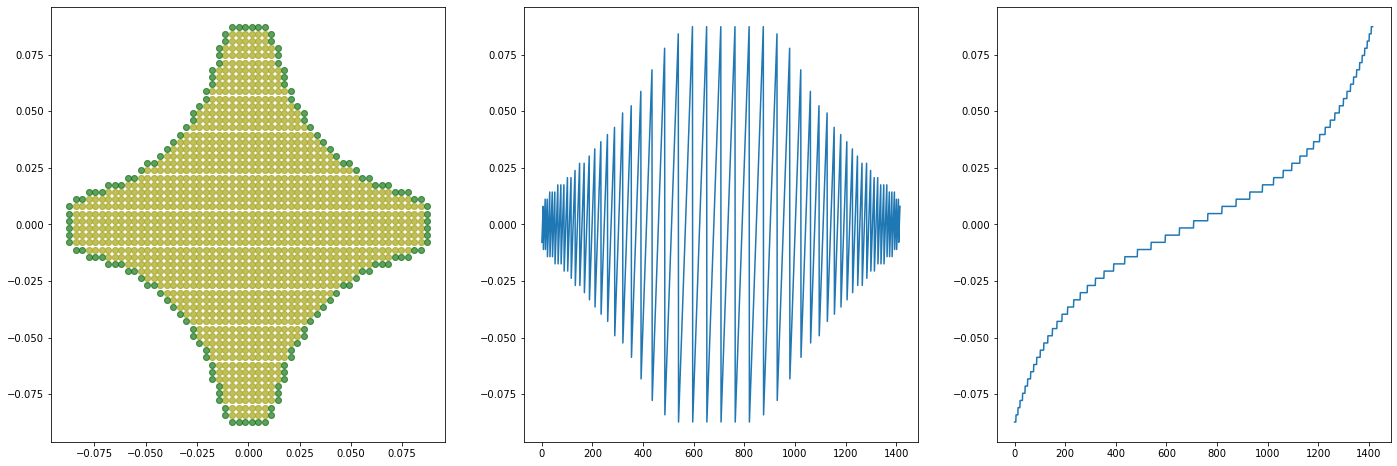

In [11]:
f,ax=plt.subplots(1,3)
f.set_size_inches(24,8)

ax[0].scatter(x,  y,  color='k', alpha=0.25)
ax[0].scatter(ix, iy, color='y', alpha=0.5)
ax[0].scatter(bx, by, color='g', alpha=0.5)
ax[1].plot(x[:])
ax[2].plot(y[:])